# EDA

 - Análise Exploratória dos Dados (Exploratory Data Analysis / EDA)
 - Ponto importante é nesse momento já termos claro o que queremos com nosso modelo, o que vamos querer fazer a previsão e entender a partir disso nossa variável.

## Objetivo do modelo

"Estime a probabilidade de um cliente responder a uma oferta" \
 "Além disso, espera-se uma análise critica que relacione os resultados obtidos ao comportamento dos grupos demográficos." \

_______

Esse foi o direcionamento que tivemos do problema, então teremos que prever a esse cliente responder a oferta da companhia, e dessa maneira temos que entender como está nossos dados e como devemos ter a target


## Bibliotecas
 - Centralizei um arquivo para ter todas as bibliotecas necessárias para a explorar um pouco nosso dados.

In [3]:
import pandas as pd
import numpy as np
import warnings
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from plotnine import ggplot, aes, geom_point, geom_smooth, theme_bw
warnings.filterwarnings('ignore')

## Dados silver


In [63]:
nb_dir = Path.cwd().parent
data_diretorio = nb_dir / "data" / "silver"

data = pd.read_csv(data_diretorio/'dados_finais.csv').drop_duplicates()
data["time_total"] = data.groupby(["person", "offer_id"])["time"].transform("max")
data["valor_total"] = data.groupby(["person", "offer_id"])["amount"].transform("sum")
data["became_member_on"] = pd.to_datetime(data["became_member_on"])


In [64]:
data[['event']].value_counts()

event          
offer received     76277
offer viewed       57725
offer completed    33182
Name: count, dtype: int64

## Exploratória da target -  _event_
 - Que temos ideia que será a direcionadora para nossa target, então vamos entender como ela está sendo distribuida

In [65]:
offers_received = data[data['event'] == 'offer received']
completed = data[data['event'] == 'offer completed'][['person', 'offer_id','amount']]
completed['responded'] = 1

data_final = offers_received.merge(completed, on=['person', 'offer_id'], how='left')
data_final['responded'] = data_final['responded'].fillna(0)
data_final = data_final.drop(columns={'amount_x','reward','event','time','amount_y'},axis=1)
data_final = data_final.drop_duplicates()
# data_final = data_final.rename(columns={'amount_y':'amount'})
# data_final['amount'] = data_final['amount'].fillna(0)
# data_final = data_final.drop_duplicates()


#### Conclusão - Exploração da target

Com base o que temos de objetivo definimos nossa base dessa seguinte maneira \
Filtramos ofertas enviadas \
Classificamos todas as ofertas completadas como 1 \
Fizemos a união desses dados, porém agora com a coluna responded que nos trás a informação da nossa target. \
Na coluna Time, temos o tempo da oferta

## Exploratória dos nossos dados



In [66]:
def descobrindo_dados(dados):
    print('DIMENSÃO DA NOSSA TABELA')
    display(dados.shape)

    print("------"*90)

    numeric_cols = dados.select_dtypes(exclude='object')
    object_cols = dados.select_dtypes(include='object')
    print("DADOS NÚMERICOS")
    print(f'colunas numericas da nossa base de dados: {list(numeric_cols)}')
    print(f'quantidade de colunas numericas: {numeric_cols.shape[1]}')

    print("------"*90)
    print("DADOS CATEGÓRICOS")

    print(f'colunas categóricas da nossa base de dados: {list(object_cols)}')
    print(f'quantidade de colunas categoricas: {object_cols.shape[1]}')

    print("------"*90)

    print('INFORMAÇÕES GERAIS DOS NOSSOS DADOS')
    display(dados.info())

    print("------"*90)
    print("DESCRIÇÃO DOS DADOS, COM INFORMAÇÕES IMPORTANTES DE COMPORTAMENTO DAS VARIÁVEIS")
    display(dados.describe())

    print("------"*90)

descobrindo_dados(data_final)

DIMENSÃO DA NOSSA TABELA


(63288, 17)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
DADOS NÚMERICOS
colunas numericas da nossa base de dados: ['age', 'became_member_on', 'income', 'reward_offer', 'difficulty', 'duration', 'email', 'mobile', 'social', 'web', 'time_total', 'valor_total', 'responded']
quantidade de colunas numericas: 13
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

None

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
DESCRIÇÃO DOS DADOS, COM INFORMAÇÕES IMPORTANTES DE COMPORTAMENTO DAS VARIÁVEIS


,age,became_member_on,income,reward_offer,difficulty,duration,email,mobile,social,web,time_total,valor_total,responded
count,63288.000000,63288,55222.000000,63288.000000,63288.000000,63288.000000,63288.0,63288.000000,63288.000000,63288.000000,63288.000000,63288.000000,63288.00000
mean,62.462110,2017-02-24 06:41:41.023890688,65388.595125,4.206232,7.711572,6.504819,1.0,0.899286,0.599529,0.799425,398.554039,10.749385,0.45816
min,18.000000,2013-07-29 00:00:00,30000.000000,0.000000,0.000000,3.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,45.000000,2016-05-26 00:00:00,49000.000000,2.000000,5.000000,5.000000,1.0,1.000000,0.000000,1.000000,246.000000,0.000000,0.00000
50%,58.000000,2017-08-02 00:00:00,63000.000000,5.000000,10.000000,7.000000,1.0,1.000000,1.000000,1.000000,432.000000,0.000000,0.00000
75%,73.000000,2017-12-30 00:00:00,80000.000000,5.000000,10.000000,7.000000,1.0,1.000000,1.000000,1.000000,564.000000,16.702500,1.00000
max,118.000000,2018-07-26 00:00:00,120000.000000,10.000000,20.000000,10.000000,1.0,1.000000,1.000000,1.000000,714.000000,1033.780000,1.00000
std,26.729957,NaN,21626.373809,3.402914,5.541480,2.203565,0.0,0.300952,0.489998,0.400434,193.625572,32.094591,0.49825


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


#### Conclusão - Exploração inicial

Temos indicios de váriaveis com dados nulos aonde termos que avaliar a forma de tratativa \
Temos idades que aparentam idados incorretas pois em uma pesquisa recente é dificil ter um ser humano que tenha passado dos 110 anos. \
Analisando também a idade, verificamos uma média de 62 anos dos nossos clientes e isso quer dizer que o publico alvo da companhia são clientes mais velhos.

### Tendo um pouco de contexto das minhas variáveis, vamos agora explorar um pouco mais de alguns tópicos:

- **Missing - Dados nulos**
- **Dados duplicados**
- **Detectar outliers**
- **Distribuição das variaveis**
- **Balanceamento da target**

### Missing - Dados nulos 

In [48]:
def analise_nulos(df,limit):

    analise_null = df.isnull().sum()
    percent_nulo = df.isnull().mean()
    types = df.dtypes
    analise_final = (
        pd.DataFrame({
            'qtd_nulo':analise_null,
            'proporcao_nulos':percent_nulo.round(2),
            'tipo_variavel':types
        })
    )
    analise_final = analise_final[analise_final['qtd_nulo']>limit]
    return analise_final

analise_nulos_finais = analise_nulos(data_final,1)
analise_nulos_finais

,qtd_nulo,proporcao_nulos,tipo_variavel
gender,8066,0.13,object
income,8066,0.13,float64


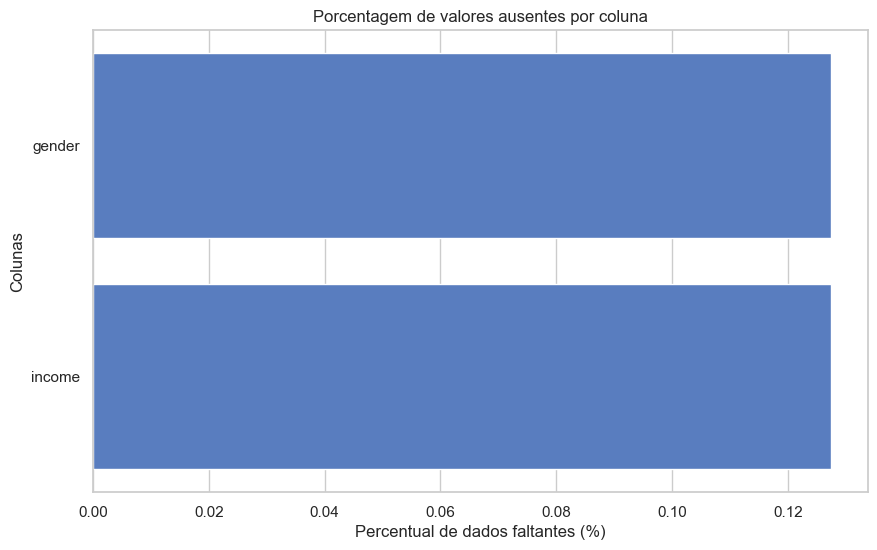

In [49]:
missing_pct = data_final.isnull().mean()
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=missing_pct.values, y=missing_pct.index)
plt.title("Porcentagem de valores ausentes por coluna")
plt.xlabel("Percentual de dados faltantes (%)")
plt.ylabel("Colunas")
plt.show()

#### Conclusão - Dados nulos

Podemos confirmar que temos variáveis com dados nulos, vamos realizar tratamentos nos dados, são dados importantes mas quando analisamos em um percentual verificamos que não são tão impactantes.

### Dados duplicados

In [50]:
duplicados = data_final[data_final.duplicated]
duplicados

,person,offer_id,gender,age,became_member_on,income,reward_offer,difficulty,duration,offer_type,email,mobile,social,web,time_total,valor_total,responded


#### Conclusão - Dados duplicados

Como fizemos um processamento inicial retirando de cara os nulos, deveriamos ter deixado e fazer um tratamento especificos, mas com a análise inicial identificamos que é apenas ruido na nossa base.

### Variaveis númericas/datas

#### Detectar outliers

In [107]:
data_final['valor_total_log'] = np.log1p(data_final['valor_total'])
num_cols = data_final.select_dtypes(include=["number"]).columns


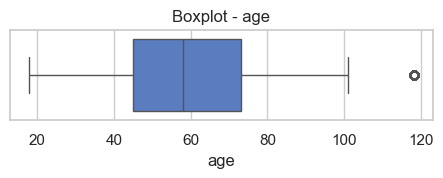

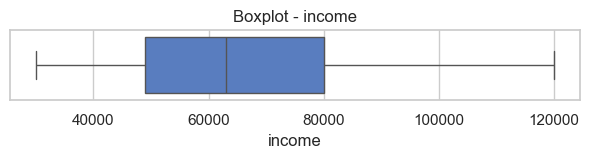

In [108]:
sns.set(style="whitegrid", palette="muted")
num_cols_box = ['age','income']
for col in num_cols_box:
    plt.figure(figsize=(12,4))
    plt.subplot(3,2,2)
    sns.boxplot(x=data_final[col])
    plt.title(f"Boxplot - {col}")

plt.tight_layout()
plt.show()

#### Distribuição das variáveis

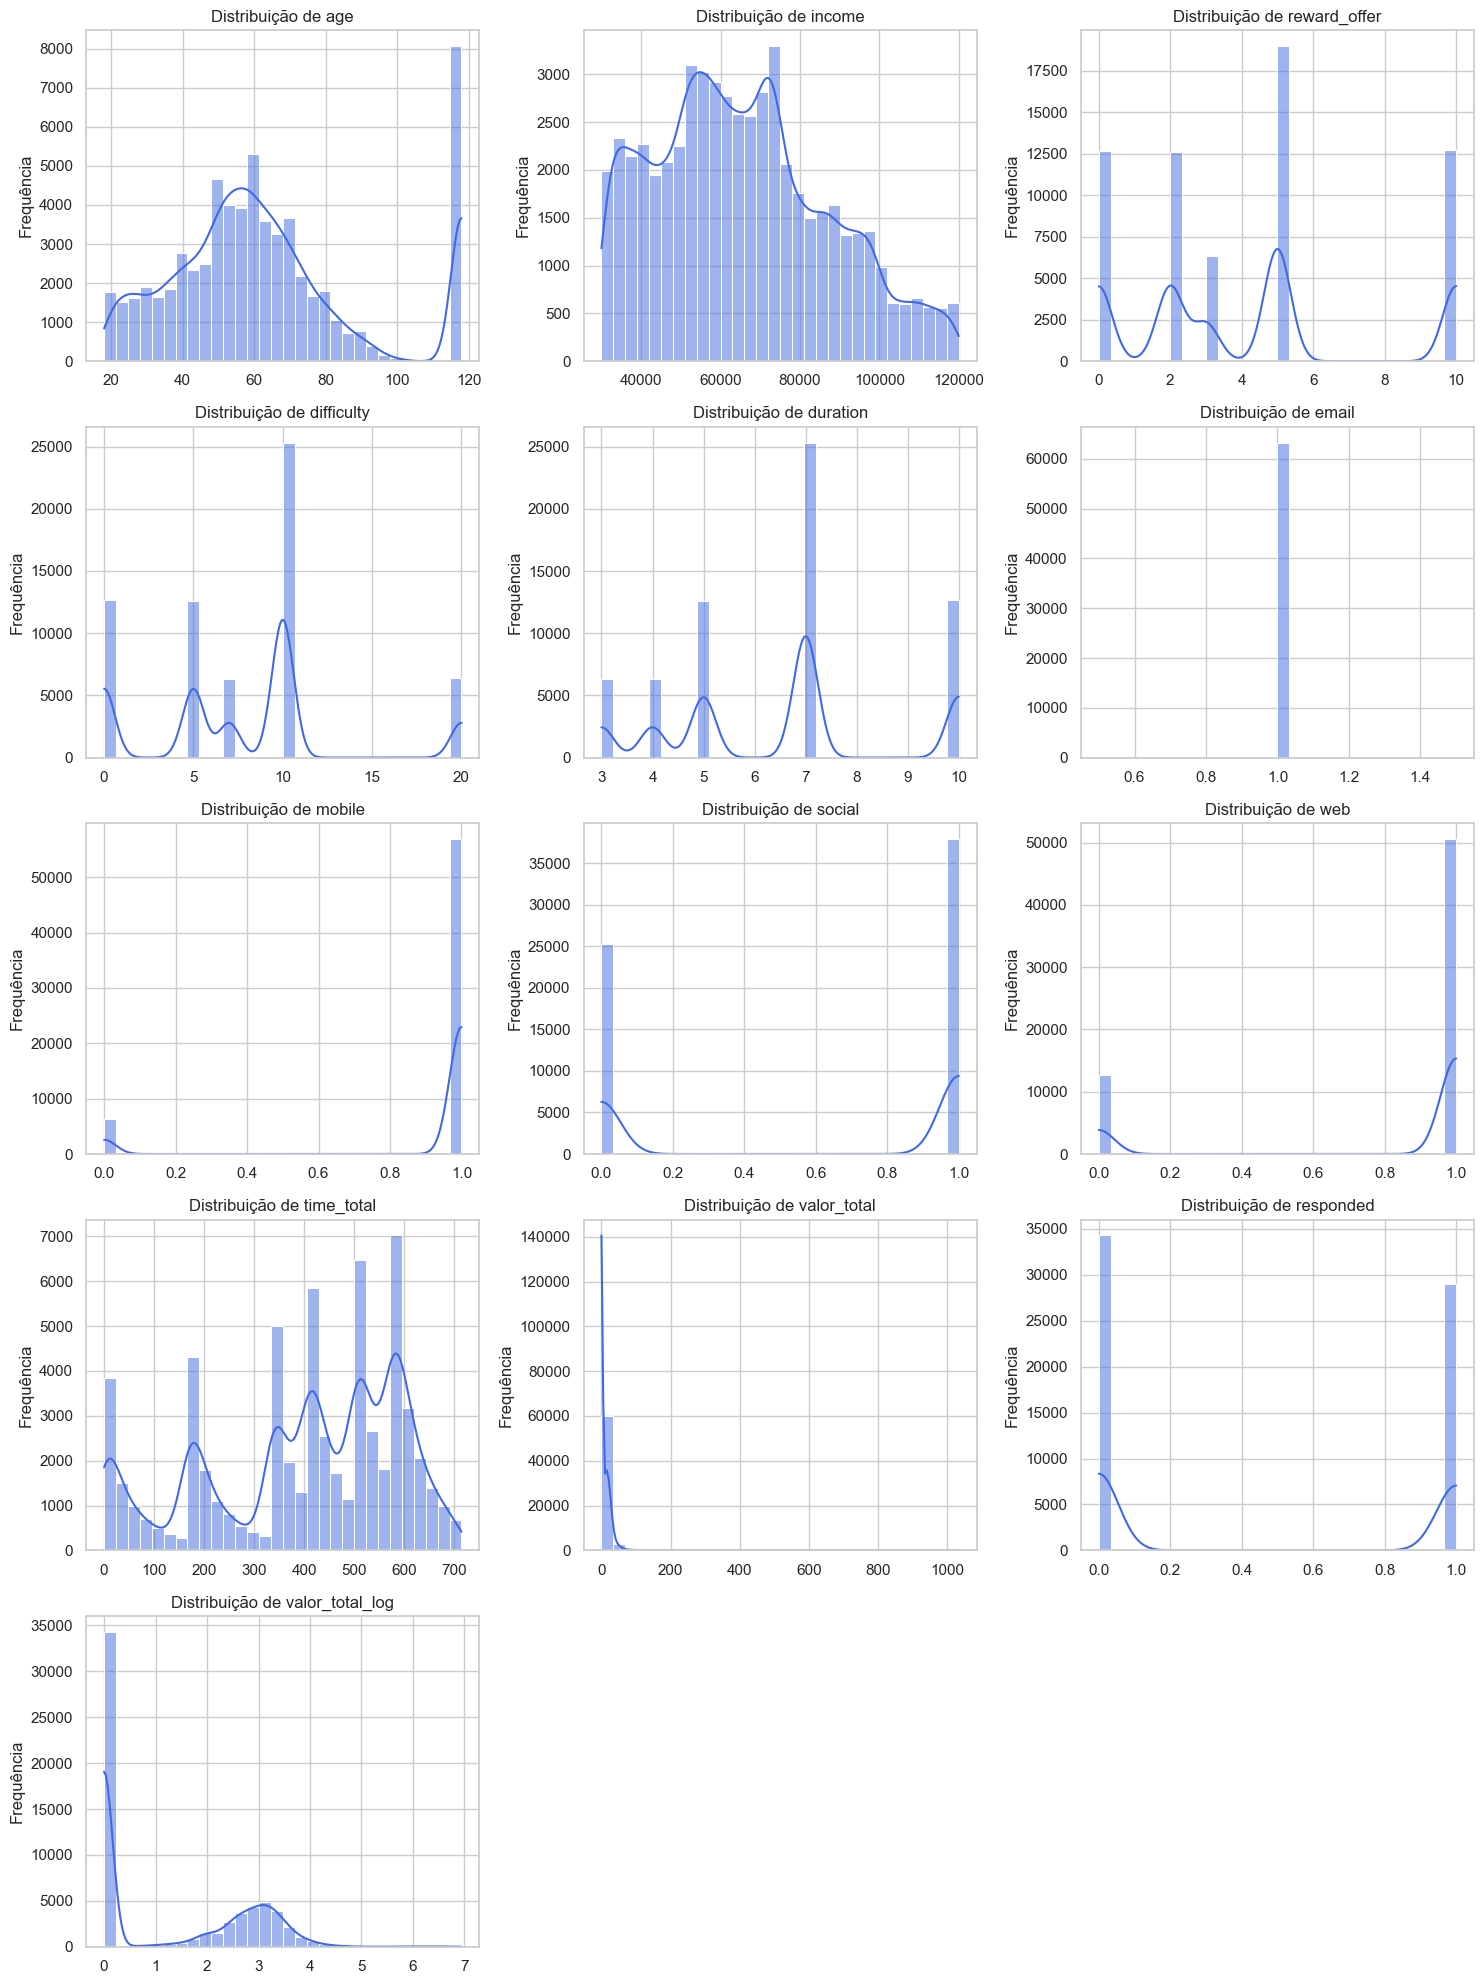

In [109]:
sns.set(style="whitegrid", palette="muted")

n = len(num_cols)
ncols = 3
nrows = (n // ncols) + 1

plt.figure(figsize=(15, 4 * nrows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(nrows, ncols, i)
    sns.histplot(data_final[col], kde=True, color='royalblue', bins=30)
    plt.title(f"Distribuição de {col}", fontsize=12)
    plt.xlabel("")
    plt.ylabel("Frequência")

plt.tight_layout()
plt.show()


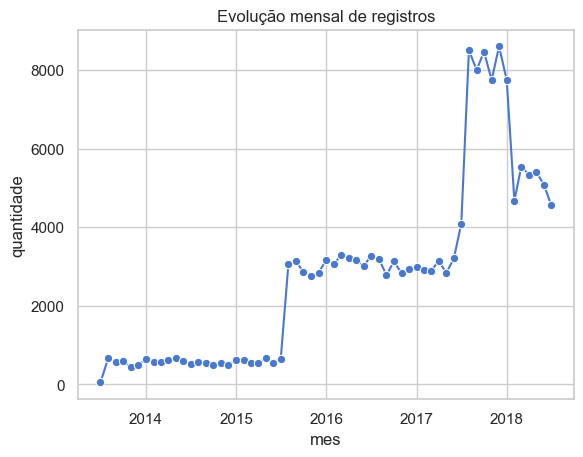

In [69]:
timeline = (
    data.assign(mes=data["became_member_on"].dt.to_period("M"))
        .groupby("mes")
        .size()
        .reset_index(name="quantidade")
)
timeline["mes"] = timeline["mes"].dt.to_timestamp()
sns.lineplot(data=timeline, x="mes", y="quantidade", marker="o")
plt.title("Evolução mensal de registros")
plt.show()


##### Conclusão - Variáveis Numericas

##### Distribuição de idade (age)
- O público alvo está entre 60 anos. 
- Observamo um número máximo que não condiz com a realidade, demontrando ser um outlier.
---
##### Distribuição de renda (income)
- Temos um publico alvo com uma renda superior 40 mil/ano, com um publico concentrado 60mil a 80mil/ano
---
##### Distribuição recompensa (reward_offer)
- Tem sua maior concentração em 5.
---
##### Distribuição canais 
- Temos que sempre encaminhamos as ofertas via e-mail e como canal principal mobile.
---
##### Distribuição mensal de registros 
- Tivemos um "boom" de quantidade de clientes nos anos de 2017 a 2018, aonde tivemos a maior quantidade de novos clientes, isso está ligado a um movimento que a companhia (Starbucks) fez em relação uma estratégia focada em expansão digital e inovação.


#### Correlação

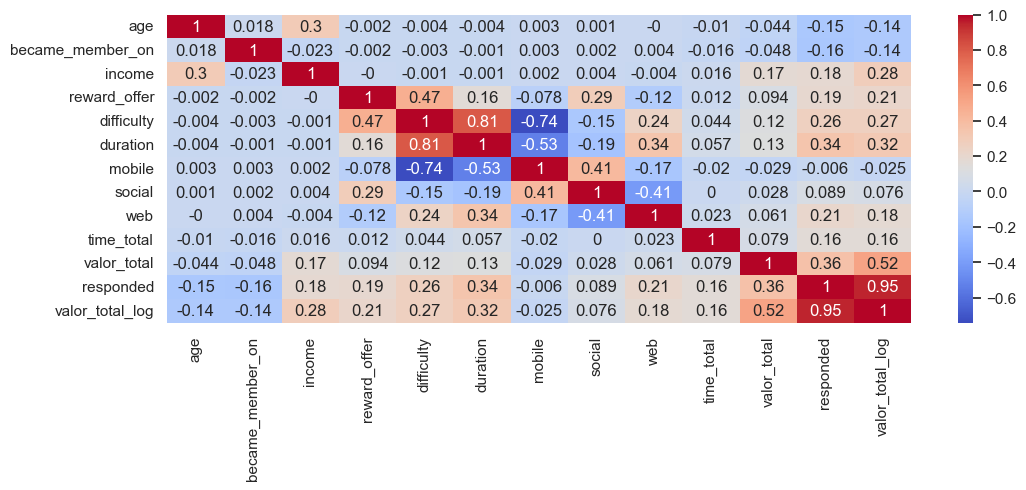

In [115]:
numeric_cols_corr = data_final.select_dtypes(exclude='object')
correlacao = numeric_cols_corr.columns.drop(['email'], errors='ignore')
correlacao_base = data_final[correlacao]
plt.figure(figsize=(12, 4))
correlations = correlacao_base.corr(method='pearson').round(3)
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

### Variaveis categóricas

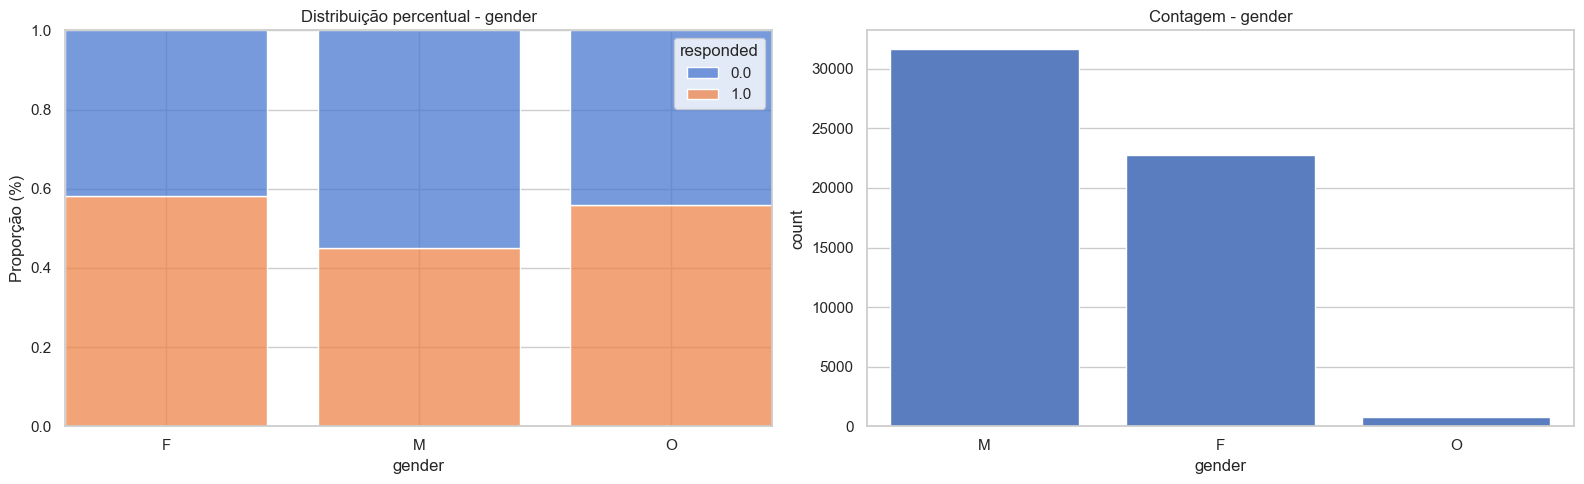

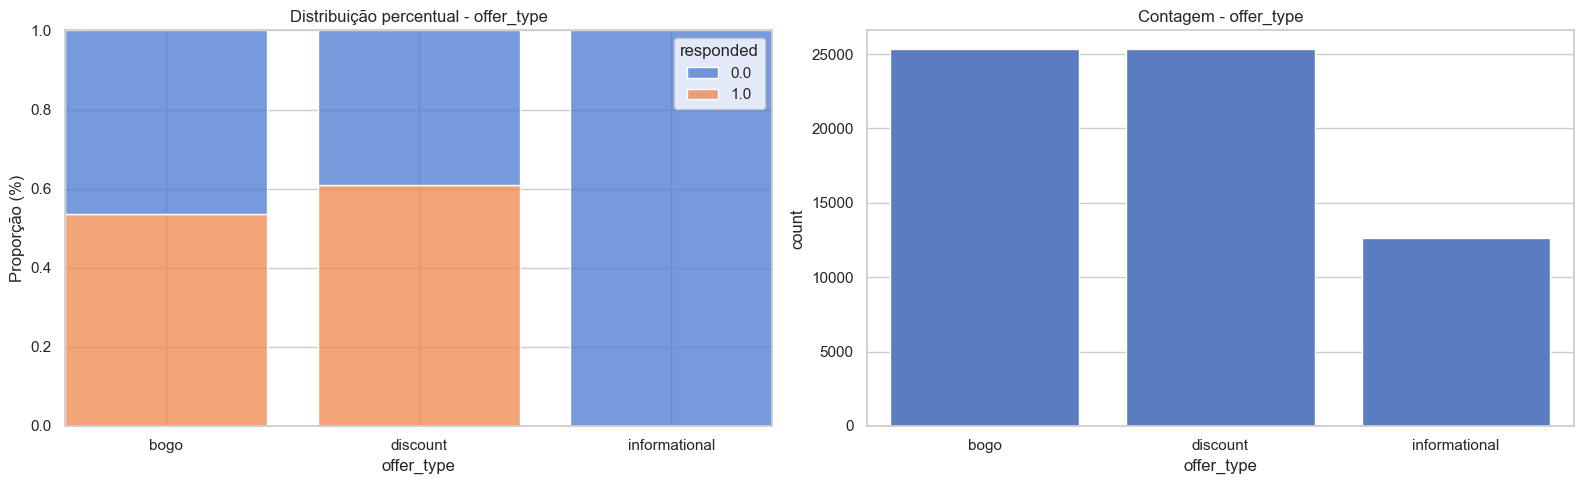

In [ ]:
object_cols = [ 'gender', 'offer_type']
for col in object_cols:
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))  
    sns.histplot(
        data=data_final, x=col, hue='responded',
        stat='percent', multiple='fill', shrink=0.8, ax=axes[0]
    )
    axes[0].set_title(f"Distribuição percentual - {col}")
    axes[0].set_ylabel("Proporção (%)")
    axes[0].tick_params(axis='x')

    sns.countplot(
        data=data_final, x=col,
        order=data_final[col].value_counts().index, ax=axes[1]
    )
    axes[1].set_title(f"Contagem - {col}")
    axes[1].tick_params(axis='x')

    plt.tight_layout()
    plt.show()


##### Conclusão - Variáveis Categóricas

##### Distribuição tipo de oferta
- Como podemos observar as ofertas sem descontos, acabam não tendo retorno, mesmo sendo a oferta menos distribuida.
---
##### Distribuição de sexo (gender)
- Temos a tratativa que será feita nos dados faltantes, porém podemos analisar que o publico feminino é mais aderente a responder e converter ofertas do que o publico masculino.
---


### Balancemento da target


responded
0.0    34292
1.0    28996
Name: count, dtype: int64
responded
0.0    0.54184
1.0    0.45816
Name: proportion, dtype: float64


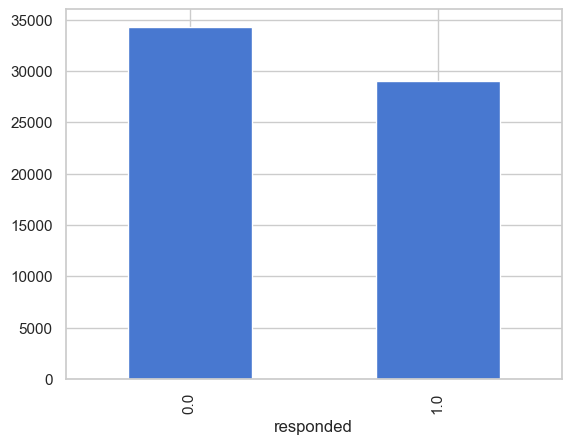

In [102]:
data_final['responded'].value_counts().plot(kind='bar')
print(data_final['responded'].value_counts())
print(data_final['responded'].value_counts(normalize=True))
plt.show()

## Salvando dados Gold

In [117]:
data_final.to_csv(nb_dir/ "data"/ "gold" /'dados_finais_gold.csv', index=False)
